In [32]:
# Validation

In [33]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt 

# data20 = pd.read_csv('experimental_data.csv')
# best_fit = pd.read_csv('model_pellets_out.csv')
# plt.plot(data20['time'], data20['inlet-p'], 'v', color='k', label = 'experimental results')
# plt.plot(best_fit['time'], best_fit['inlet-p'], '.', color='C1', label = 'best fit')
# plt.xlabel('time (s)', fontsize = 12)
# plt.xlim(0,435)
# plt.ylim(0, 5000000) 
# plt.ylabel('pressure (Pa)', fontsize = 12)
# plt.tick_params(axis='both', which='major', labelsize=12) 
# plt.legend(fontsize = 12) 
# plt.grid()

In [34]:
import numpy as np
import csv
 
start_value1= 1.5e-04
end_value1 = 3.5e-04


# Define the step size for the range
array = np.linspace(start_value1, end_value1, 20)

csv_file = 'parameters.csv'

with open(csv_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['particle_diameter_1'])
    writer.writerows(zip(array))

/var/folders/nf/tk1_dsm923q946nd2xz6z6g0nv_859/T/ipykernel_87615/1568772388.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_palette = plt.cm.get_cmap('tab20', len(data_frames))


[0.19834925 0.10639107 0.11085037 0.18167374 0.25887815 0.33133292
 0.39758787 0.45783471 0.51260379 0.56246888 0.60796418 0.64956615
 0.6876987  0.72273564 0.75500021 0.7847801  0.81232461 0.83785144
 0.86155463 0.88360682]


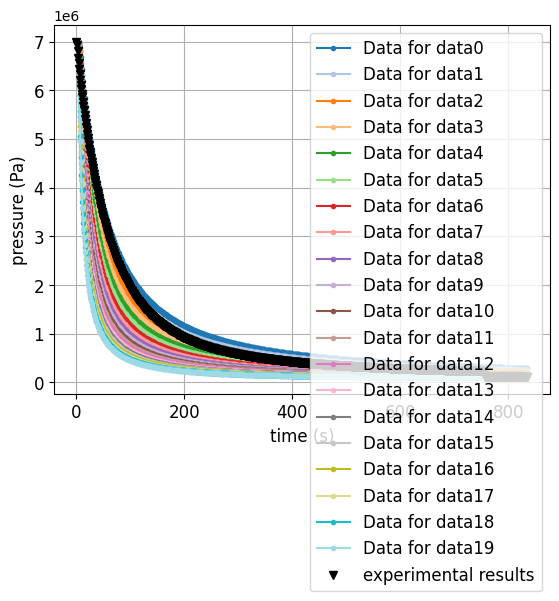

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create an empty dictionary to store the DataFrame
data_frames = {}
RMSE = np.array([])
data20 = pd.read_csv('experimental_data.csv')

# Loop through numbers
for i in range(0, 20):
    filename = f'stochastic_tools_out_runner{i:02d}.csv'
    data_frames[f'data{i}'] = pd.read_csv(filename) 

# Function to compute Absolute Root Mean Square Error (ARMSE)
def compute_armse(y_values, experimental_y_values):
    absolute_error = np.abs(y_values - experimental_y_values)
    squared_error = absolute_error**2
    mean_squared_error = np.mean(squared_error)
    rmse = np.sqrt(mean_squared_error)
    return rmse

color_palette = plt.cm.get_cmap('tab20', len(data_frames))

# Plot the data for each DataFrame with different line colors
for idx, (key, df) in enumerate(data_frames.items()):
    plt.plot(df['time'], df['inlet-p'], color=color_palette(idx), marker = '.', label=f'Data for {key}')
    # Compute the error between the plot and experimental data
    x_values = df['time']
    y_values = df['inlet-p']
    experimental_y_values = np.interp(x_values, data20['time'], data20['inlet-p'])
    range_of_observed_values = np.max(experimental_y_values) - np.min(experimental_y_values)
    rmse = compute_armse(y_values, experimental_y_values)/range_of_observed_values*100
    rmse = compute_armse(y_values, experimental_y_values)/1e6
    # Append the value to the NumPy array
    RMSE = np.append(RMSE, rmse) 

 
print(RMSE)


plt.plot(data20['time'], data20['inlet-p'], 'v', color='k', label = 'experimental results')
plt.xlabel('time (s)', fontsize = 12)
# plt.ylim(0, 5000000)
plt.ylabel('pressure (Pa)', fontsize = 12)
plt.tick_params(axis='both', which='major', labelsize=12) 
plt.legend(fontsize = 12)
plt.grid()


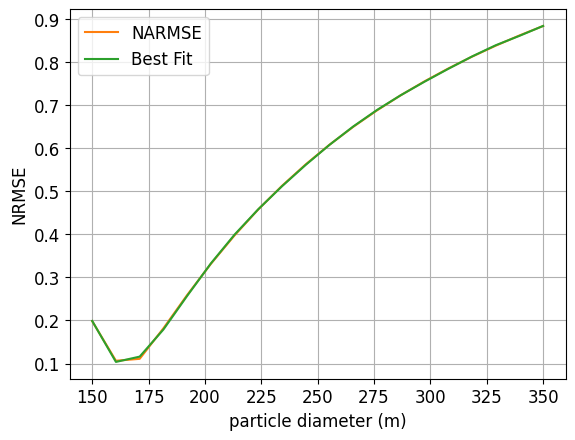

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  

particle_diameter_1 = pd.read_csv('parameters.csv')*1e6

degree = 9# Degree of the polynomial
coefficients = np.polyfit(particle_diameter_1['particle_diameter_1'], RMSE, degree)
poly_function = np.poly1d(coefficients)
y_fit = poly_function(particle_diameter_1['particle_diameter_1'])

plt.plot(particle_diameter_1['particle_diameter_1'], RMSE, color='C1', label = 'NARMSE')
plt.plot(particle_diameter_1['particle_diameter_1'], y_fit, color='C2', label = 'Best Fit')
plt.xlabel('particle diameter (m)', fontsize = 12)
plt.ylabel('NRMSE', fontsize = 12)
plt.tick_params(axis='both', which='major', labelsize=12) 
plt.legend(fontsize = 12)
plt.grid()